# General overview on data and structure

Overview on the data set. Structural flaws will be tried to cured, however outliers and such will only be identified and not yet deleted as the relevant rows might be needed for feature engineering.

General comment:

If the number of rows to be dropped due to inconsistencies or NaN values is relatively small in comparison to the overall dataset than the rows will be rather dropped and no other means will be taken e.g. imputation.

In [825]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [826]:
# Adjust settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
%matplotlib inline

In [827]:
# Load preprocessed dataset
data_path = '../data/interim/'
df = pd.read_pickle(os.path.join(data_path, 'preprocessed.pkl'))

In [828]:
# Initial look on pre-processed data set
print(df.shape)
df.head()

(12030, 33)


,flt_leg,flt_carrier,flt_fnum,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_mingt,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_leg,gnd_sched_tat,gnd_catering_dur,gnd_clean_dur,gnd_board_dur,arr_delay
0,272005011,East Carmen Airlines,EC3098,North Gregory,East Carmen,2019-06-01 00:43:00,2019-06-01 04:12:00,ECLBSX,other problem,3.0,320,0.0,0.0,Start,"['Jason Brown_nan_nan_nan_cp', 'Jacob Stein_na...",[],235.0,268.0,2019-06-01 00:40:00,2019-06-01 04:30:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-18.0
1,272009188,East Carmen Airlines,EC3146,Port Bobby,East Carmen,2019-06-01 01:58:00,2019-06-01 03:40:00,ECLWHX,no reason,-7.0,E95,0.0,0.0,Start,"['Scott Baker_nan_nan_nan_cp', 'Ruth Hoffman_n...",[],130.0,189.0,2019-06-01 02:05:00,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-20.0
2,271984537,East Carmen Airlines,EC2840,Port Ryan,East Carmen,2019-06-01 02:24:00,2019-06-01 03:57:00,ECLGLX,other problem,4.0,DH4,0.0,0.0,Start,"['Cory Cooper_nan_nan_nan_ca', 'Morgan Foster_...",[],185.0,196.0,2019-06-01 02:20:00,2019-06-01 03:50:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,7.0
3,272025831,East Carmen Airlines,EC3306,Coleland,East Carmen,2019-06-01 02:28:00,2019-06-01 03:49:00,ECLBMX,other problem,3.0,320,0.0,0.0,Start,"['Anne Davis_nan_nan_nan_ca', 'Miss Amanda Har...",[],145.0,175.0,2019-06-01 02:25:00,2019-06-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,-11.0
4,272006092,East Carmen Airlines,EC3114,East Melissaberg,East Carmen,2019-06-01 03:02:00,2019-06-01 04:43:00,ECLGNX,other problem,32.0,DH4,0.0,0.0,Start,"['Renee Fisher_nan_nan_nan_ca', 'Rebecca Castr...",[],35.0,21.0,2019-06-01 02:30:00,2019-06-01 04:15:00,DH4,ECLGNX,NaN,East Melissaberg,East Carmen,2019-06-01 02:30:00,2019-06-01 04:15:00,272006092.0,NaN,NaN,NaN,NaN,28.0


In [829]:
# Having a look on all variables and their statistics
df.describe(include='all')

,flt_leg,flt_carrier,flt_fnum,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_mingt,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_leg,gnd_sched_tat,gnd_catering_dur,gnd_clean_dur,gnd_board_dur,arr_delay
count,12030.0,12030,12030,12030,12030,12030,11947,12030,12030,12030.000000,12030,12030.000000,12030.000000,12030,12030,12030,10013.000000,9951.000000,12030,12030,8267,8267,4122.000000,8267,8266,8267,8267,8267.0,4122.000000,4122.000000,3.000000,3731.000000,11947.000000
unique,11977.0,1,614,113,112,9731,9819,70,4,NaN,3,NaN,NaN,5,11927,56,NaN,NaN,4901,4993,7,69,NaN,102,101,3874,3875,8240.0,NaN,NaN,NaN,NaN,NaN
top,271983677.0,East Carmen Airlines,EC11860,East Carmen,East Carmen,2019-06-25 08:35:00,2019-06-21 10:31:00,ECLWLX,other problem,NaN,320,NaN,NaN,A,"['Shawn Miller_nan_nan_nan_cp', 'Emily Oconnel...",[],NaN,NaN,2019-06-14 13:00:00,2019-06-06 12:20:00,320,ECLXBX,NaN,East Carmen,East Carmen,2019-06-19 13:00:00,2019-06-13 12:20:00,272104747.0,NaN,NaN,NaN,NaN,NaN
freq,2.0,12030,33,5461,5445,6,5,207,7490,NaN,6074,NaN,NaN,6020,3,10000,NaN,NaN,11,14,2970,156,NaN,4122,4145,11,13,2.0,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2019-06-01 00:43:00,2019-06-01 03:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-01 00:40:00,2019-06-01 03:50:00,NaN,NaN,NaN,NaN,NaN,2019-06-01 02:30:00,2019-06-01 04:15:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2019-06-30 23:19:00,2019-07-01 04:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-30 23:15:00,2019-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,2019-06-30 21:10:00,2019-06-30 23:05:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.800914,NaN,27.725603,34.991687,NaN,NaN,NaN,62.948167,66.626771,NaN,NaN,NaN,NaN,39.115721,NaN,NaN,NaN,NaN,NaN,56.169335,21.957060,21.505556,18.240954,21.175190
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.654152,NaN,31.905478,31.509333,NaN,NaN,NaN,56.569487,70.937953,NaN,NaN,NaN,NaN,3.267638,NaN,NaN,NaN,NaN,NaN,16.854098,4.327286,10.667400,8.294744,26.764198
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.000000,NaN,-134.000000,0.000000,NaN,NaN,NaN,-245.000000,-383.000000,NaN,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,-120.000000,15.000000,14.000000,0.000000,-83.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,45.000000,33.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,45.000000,18.000000,15.400000,13.000000,3.000000


In [830]:
# Indicate share and total number of missing data per variable
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
gnd_clean_dur,12027,0.999751
gnd_board_dur,8299,0.689859
gnd_catering_dur,7908,0.657357
gnd_sched_tat,7908,0.657357
gnd_mingt,7908,0.657357
gnd_arr_airpt,3764,0.312884
gnd_leg,3763,0.312801
gnd_sched_arr,3763,0.312801
gnd_sched_dep,3763,0.312801
gnd_dep_airpt,3763,0.312801


In [831]:
# Exploring options to impute data for gnd_mingt as this variable is not linked to the scheduling, but is rather aircraft type related.
df[['gnd_mingt', 'gnd_ac_type']].groupby('gnd_ac_type').describe()

gnd_mingt                                                   
                count       mean       std   min   25%   50%   75%   max
gnd_ac_type                                                             
319             429.0  40.000000  0.000000  40.0  40.0  40.0  40.0  40.0
320            1483.0  40.006743  0.183556  40.0  40.0  40.0  40.0  45.0
321             164.0  45.000000  0.000000  45.0  45.0  45.0  45.0  45.0
322             157.0  45.000000  0.000000  45.0  45.0  45.0  45.0  45.0
DH4             578.0  33.356401  2.350774  30.0  30.0  35.0  35.0  35.0
DHX             217.0  33.456221  2.315241  30.0  30.0  35.0  35.0  35.0
E95            1094.0  40.000000  0.000000  40.0  40.0  40.0  40.0  40.0

In [832]:
# Imputing the median per aircraft type from the ground data for missing values.
df['gnd_mingt'] = df['gnd_mingt'].fillna(df.groupby('gnd_ac_type')['gnd_mingt'].transform('median'))

In [833]:
# Drop the remaining columns with more than 50% missing values.
df.drop(['gnd_sched_tat', 'gnd_catering_dur', 'gnd_clean_dur', 'gnd_board_dur'], axis=1, inplace=True)
# Drop rows with missing dependent variable
print(df.shape)
df.dropna(subset=['arr_delay'], inplace=True)
# Drop additional duplicates if there are new ones due to dropped columns
print(df.shape)
df.drop_duplicates(inplace=True, ignore_index=True)
print(df.shape)

(12030, 29)
(11947, 29)
(11934, 29)


# Univariate data exploration
## Flight leg

In [834]:
# Explore flt_leg
df['flt_leg'].describe()

count         11934
unique        11896
top       272088104
freq              2
Name: flt_leg, dtype: int64

In [835]:
# Compare flt_leg and gnd_leg if available
df[df.gnd_leg.notna() & (df['flt_leg'].astype(object) != df['gnd_leg'].astype(object))]

,flt_leg,flt_carrier,flt_fnum,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_mingt,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,gnd_leg,arr_delay


In [836]:
# Identify duplicates in flt_leg and drop them; drop gnd_leg as well as there is no additional information
print(df.shape)
dup_flt_leg = df[df.duplicated(['flt_leg'], keep=False)]
dup_flt_leg.to_csv('../data/interim/dup_flt_leg.csv')
df.drop_duplicates(subset='flt_leg', inplace=True, ignore_index=True)
df = df.drop(columns='gnd_leg')
print(df.shape)

(11934, 29)
(11896, 28)


## Carrier

In [837]:
# Explore flt_carrier
df['flt_carrier'].value_counts()

East Carmen Airlines    11896
Name: flt_carrier, dtype: int64

In [838]:
# Drop flt_carrier as there is no information in this column
df = df.drop(columns='flt_carrier')

## Flight number and routings

In [839]:
# Find all unique routings as combinations of fn_number, dep_ap_sched & arr_ap_sched
# Assumption that there is only one valid routing per fn_number 
routing = df[['flt_fnum', 'flt_dep_airpt', 'flt_arr_airpt']].value_counts().reset_index(name='count')
dup_fnnum = routing[routing.duplicated(['flt_fnum'], keep=False)]
print(dup_fnnum.sort_values(by='flt_fnum', ascending=True))

    flt_fnum     flt_dep_airpt       flt_arr_airpt  count
478  EC11525  East Allisontown           Aaronbury      5
479  EC11525         Aaronbury  North Stephenville      5
581  EC11859       East Carmen      New Stacyburgh      2
553  EC11859       East Carmen        East Michael      4
453  EC11860    New Stacyburgh         East Carmen      6
508  EC11860      East Michael      New Stacyburgh      5
562  EC11860    New Stacyburgh        East Michael      3
558  EC11860      East Michael         East Carmen      3
584  EC11869       East Carmen      South Victoria      1
607  EC11869       East Carmen           Jamesview      1
602   EC3027          West Ana         East Carmen      1
140   EC3027       East Carmen         Gilbertland     30
191   EC3117       East Carmen           Dudleyton     29
627   EC3117     Lake Joelbury         East Carmen      1
619   EC3292   South Nathaniel         East Carmen      1
220   EC3292       New Jessica         East Carmen     29
533   EC4498  

In [840]:
# Drop flt_fnum as all information is contained in the routing itself and flight number seem to be not consistent
df = df.drop(columns='flt_fnum')

## Departure airports

In [841]:
# Compare flt_dep_airpt and gnd_dep_airpt if available
df[df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_mingt,gnd_dep_airpt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,arr_delay
4563,271986377,Kennethfort,East Carmen,2019-06-12 13:37:00,2019-06-12 15:16:00,ECLBRX,other problem,2.0,320,23.0,45.0,A,"['Paul Bryant_182_23_45_ca', 'Shannon Schmidt_...",[],460.0,479.0,2019-06-12 13:35:00,2019-06-12 15:35:00,320,ECLBRX,45.0,South Haileyberg,East Carmen,2019-06-12 13:35:00,2019-06-12 15:35:00,-19.0
4767,271994246,East Holly,East Carmen,2019-06-13 05:14:00,2019-06-13 06:14:00,ECLWMX,no reason,-11.0,E95,0.0,0.0,Start,"['Laura Marshall_nan_nan_nan_cp', 'Matthew Cur...",[],135.0,161.0,2019-06-13 05:25:00,2019-06-13 06:30:00,E95,ECLWMX,40.0,Paulbury,East Carmen,2019-06-13 05:25:00,2019-06-13 06:30:00,-16.0
7691,271968559,West Jason,East Carmen,2019-06-20 09:01:00,2019-06-20 10:13:00,ECLXDX,other problem,1.0,320,4.0,45.0,A,"['Lynn Murphy_88_4_45_cp', 'Linda Watts_88_4_4...",[],85.0,92.0,2019-06-20 09:00:00,2019-06-20 10:20:00,320,ECLXDX,45.0,Kennethfort,East Carmen,2019-06-20 09:00:00,2019-06-20 10:20:00,-7.0


In [842]:
# Delete rows with missmatching dep_airpt and drop gnd_dep_airpt as there is no additional information in comparison to flt_dep_arpt
print(df.shape)
dep_mismatch = df[df.flt_dep_airpt.notna() & df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))]
dep_mismatch.to_csv('../data/interim/dep_mismatch.csv')
df = df.drop(df[df.gnd_dep_airpt.notna() & (df['flt_dep_airpt'] != df['gnd_dep_airpt'].astype(str))].index)
df = df.drop(columns='gnd_dep_airpt')
print(df.shape)

(11896, 26)
(11893, 25)


## Arrival airport

In [843]:
# Compare flt_arr_airpt and gnd_arr_airpt if available
arr_mismatch = df[df.gnd_arr_airpt.notna() & (df['flt_arr_airpt'].astype(str) != df['gnd_arr_airpt'].astype(str))]
arr_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_mingt,gnd_arr_airpt,gnd_sched_dep,gnd_sched_arr,arr_delay
4287,271970762,East Carmen,West Jason,2019-06-11 19:13:00,2019-06-11 20:49:00,ECLBMX,other problem,13.0,320,28.0,50.0,A,"['Jackie Black_340_28_50_ca', 'Mark Anderson_3...","['ca', 'cp', 'cp', 'ca', 'ca']",NaN,NaN,2019-06-11 19:00:00,2019-06-11 20:20:00,320,ECLBMX,40.0,Susanmouth,2019-06-11 19:00:00,2019-06-11 20:20:00,29.0


In [844]:
# Delete rows with missmatching arr_airpt and drop gnd_arr_airpt as there is no additional information in comparison to flt_dep_arpt
print(df.shape)
arr_mismatch.to_csv('../data/interim/arr_mismatch.csv')
df = df.drop(df[df.gnd_arr_airpt.notna() & (df['flt_arr_airpt'].astype(str) != df['gnd_arr_airpt'].astype(str))].index)
df = df.drop(columns='gnd_arr_airpt')
print(df.shape)

(11893, 25)
(11892, 24)


## Offblock

In [845]:
# Explore flt_offblock 
df['flt_offblock'].describe() 

count                   11892
unique                   9657
top       2019-06-25 08:35:00
freq                        6
first     2019-06-01 00:43:00
last      2019-06-30 23:19:00
Name: flt_offblock, dtype: object

Nothing special to mention here as the offblock times are in the corridor as indicated in the task description.

## Onblock

In [846]:
# Explore flt_onblock 
df['flt_onblock'].describe()

count                   11892
unique                   9801
top       2019-06-28 09:52:00
freq                        5
first     2019-06-01 03:40:00
last      2019-07-01 04:01:00
Name: flt_onblock, dtype: object

Although there are flights that have an offblock time outside the timeframe mentioned in the task descriptions, it is acceptable as the related offblock times are fine.

## Aircraft registration

In [847]:
# Check mismatches in AC registration between flight data and ground data
ac_reg_mismatch = df[df.gnd_ac_reg.notna() & (df['flt_ac_reg'].astype(str) != df['gnd_ac_reg'].astype(str))]
ac_reg_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_ac_type,gnd_ac_reg,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay


In [848]:
# Drop gnd_ac_reg as all information is already contained in flt_ac_reg
df = df.drop(columns='gnd_ac_reg')

## Flight change code

In [849]:
# Explore flt_change_code
df['flt_change_code'].value_counts(dropna=False)

other problem         7399
technical problem     2032
rotational problem    1595
no reason              866
Name: flt_change_code, dtype: int64

In [850]:
# flt_change_code will be dropped as this variable will only be available after the flight actually occurs and therefore has no
# predictive value.
df = df.drop(columns='flt_change_code')

## Departure delay

count    11892.000000
mean        25.865624
std         25.685488
min        -14.000000
25%         10.000000
50%         17.000000
75%         35.000000
max        476.000000
Name: dep_delay, dtype: float64


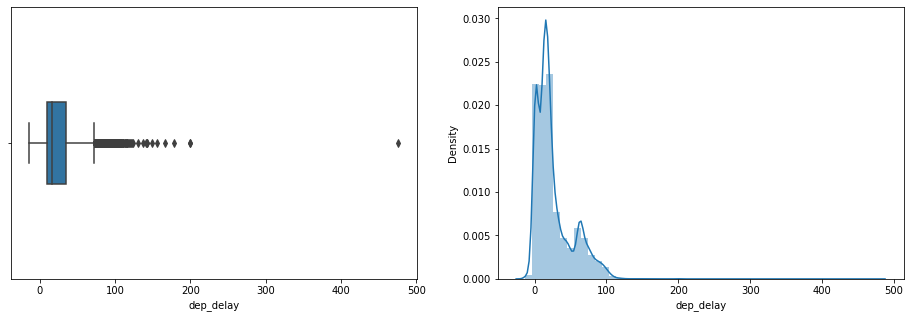

In [851]:
# Explore dep_delay
print(df['dep_delay'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['dep_delay'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['dep_delay'])
plt.show()

## Aircraft type

In [852]:
# Explore flt_ac_type
df.flt_ac_type.value_counts(dropna=False)

320    5990
E95    3230
DH4    2672
Name: flt_ac_type, dtype: int64

In [853]:
# Explore gnd_ac_type
df.gnd_ac_type.value_counts(dropna=False)

NaN    3657
320    2952
E95    2179
DH4    1165
319     860
DHX     434
321     329
322     316
Name: gnd_ac_type, dtype: int64

In [854]:
# Check crosstab for flight and ground data
pd.crosstab(df['flt_ac_type'], df['gnd_ac_type'])

gnd_ac_type,319,320,321,322,DH4,DHX,E95
flt_ac_type,,,,,,,
320,860,2952,329,316,0,0,0
DH4,0,0,0,0,1165,434,0
E95,0,0,0,0,0,0,2179


In [855]:
# The gorund data for the aircraft type is a bit more specific as it indicates sub-variants e.g. A321. Therefore the aircraft type
# will be imputed based on existing information for the registrations. A separate table with rows for registration and aircraft type (ground)
# will be generated and merged with the full dataset. The previously existing columns specifying the aircraft type will be dropped afterwards.

ac_type = df[['flt_ac_reg', 'gnd_ac_type']].drop_duplicates().dropna()
df = pd.merge(df, ac_type, left_on='flt_ac_reg', right_on='flt_ac_reg', how='left')
df['AC_type'] = df['gnd_ac_type_y']
# There is one registration for which no ground data is available, but as there is onformation from the flight data the AC_type will be
# set manually.
df['AC_type'].fillna('DH4', inplace=True)
df.drop(['gnd_ac_type_x', 'gnd_ac_type_y', 'flt_ac_type'], axis=1, inplace=True)

In [856]:
# Repeat the imputation for mingt as median per aircraft type from the ground data for missing values.
df['gnd_mingt'] = df['gnd_mingt'].fillna(df.groupby('AC_type')['gnd_mingt'].transform('median'))

## Actual Transition Time

count    11892.000000
mean        27.739657
std         31.888664
min       -134.000000
25%          0.000000
50%         28.000000
75%         49.000000
max        470.000000
Name: flt_tt, dtype: float64


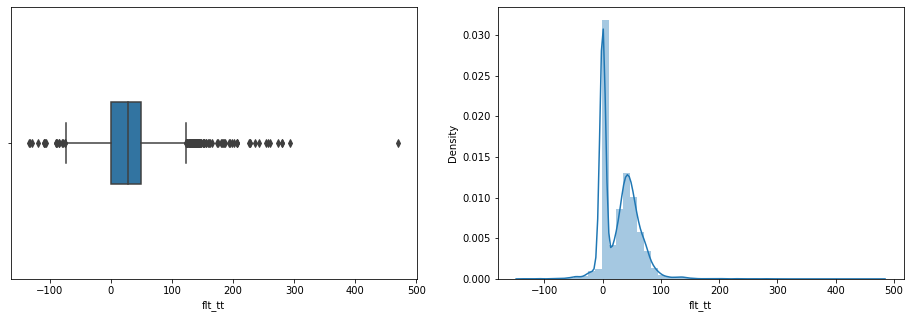

In [857]:
# Explore flt_tt
print(df['flt_tt'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['flt_tt'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['flt_tt'])
plt.show()

There are negative values transition time, meaning the parts of the crew should have left with another aircraft before the aircraft they are on landed. As this could be true for heavy delays there are no actions to be taken.

## Scheduled Transition Time

count    11892.000000
mean        34.958375
std         31.527233
min          0.000000
25%          0.000000
50%         45.000000
75%         50.000000
max        495.000000
Name: flt_sched_tt, dtype: float64


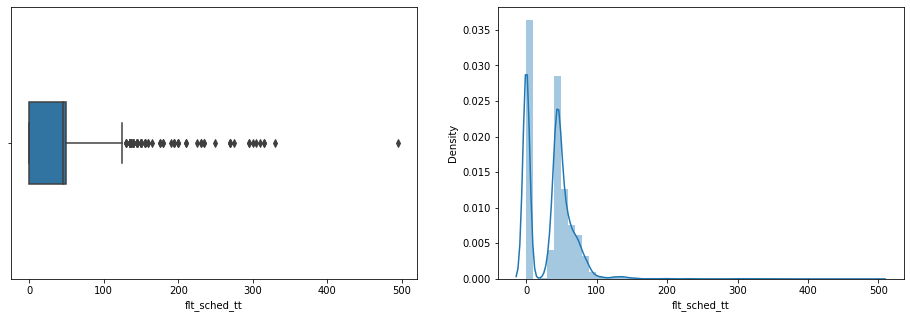

In [858]:
# Explore flt_sched_tt
print(df['flt_sched_tt'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['flt_sched_tt'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['flt_sched_tt'])
plt.show()

Although it might seem strange on first sight that there are a lot of 0 in the scheduled transition time this might be correct for the first flights of the day as there are no NaN values. However, this will be validated at a later stage.

## Crew Group

In [859]:
# Explore flt_crewg
df.flt_crewg.value_counts(dropna=False)

A        5945
Start    4283
C         746
B         493
B2        425
Name: flt_crewg, dtype: int64

## Crew Transit

In [860]:
# Explore flt_TLC_trans
# Ensuring that nested lists are stored as such
df['flt_TLC_trans'] = df['flt_TLC_trans'].apply(eval)
df.flt_TLC_trans.describe()

count                                                 11892
unique                                                11824
top       [Zachary Coleman_64_43_45_ca, Tony Cobb_64_43_...
freq                                                      2
Name: flt_TLC_trans, dtype: object

## Crew Change

In [861]:
# Explore flt_crewt_change
df['flt_crewt_change'] = df['flt_crewt_change'].apply(eval)
df.flt_crewt_change.describe()

count     11892
unique       56
top          []
freq       9884
Name: flt_crewt_change, dtype: object

## Scheduled Groundtime

count    9901.000000
mean       62.862337
std        55.460179
min      -245.000000
25%        45.000000
50%        50.000000
75%        65.000000
max       945.000000
Name: flt_sched_gt, dtype: float64


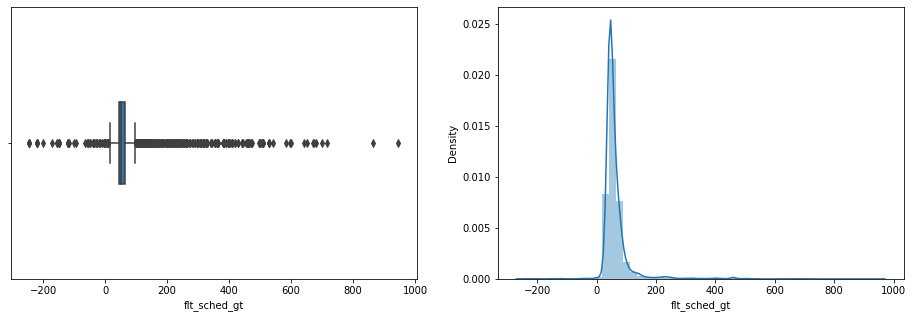

In [862]:
# Explore flt_sched_gt
print(df['flt_sched_gt'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['flt_sched_gt'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['flt_sched_gt'])
plt.show()

In [863]:
# How many cases have a negative scheduled groundtime?
df[(df['flt_sched_gt'] < 0)].shape

(51, 21)

### Looking at the negative values for flight groundtime

In [864]:
# Identifying a specific aircraft wherer flt_sched_gt < 0 to analyse why there is a negative schedulded gt for a specific date
condition = df['flt_sched_gt'] < 0
sample = df[condition].sample(n=3, random_state=42)

sample

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay,AC_type
10435,272088110,New Stacyburgh,East Michael,2019-06-27 08:53:00,2019-06-27 09:59:00,ECLBKX,3.0,-49.0,45.0,A,"[Mary Jones_88_-49_45_ca, Justin Roth_88_-49_4...",[],-55.0,34.0,2019-06-27 08:50:00,2019-06-27 09:45:00,40.0,NaT,NaT,14.0,320
9981,272029888,East Carmen,Fisherhaven,2019-06-26 08:07:00,2019-06-26 09:13:00,ECLGMX,22.0,27.0,30.0,C,"[Mary Curtis_81_27_30_cp, William Harris_nan_n...",[cp],-10.0,-24.0,2019-06-26 07:45:00,2019-06-26 08:40:00,30.0,2019-06-26 07:45:00,2019-06-26 08:40:00,33.0,DH4
11419,272218014,East Allisontown,Aaronbury,2019-06-29 16:27:00,2019-06-29 17:07:00,ECLBJX,2.0,33.0,45.0,A,"[Erika Sandoval_232_33_45_cp, Julia Holloway_2...",[],-40.0,64.0,2019-06-29 16:25:00,2019-06-29 17:05:00,40.0,NaT,NaT,2.0,320


In [865]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLBKX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-27')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay,AC_type
10302,272002049,Ryanland,East Carmen,2019-06-27 04:02:00,2019-06-27 06:55:00,ECLBKX,17.0,0.0,0.0,Start,"[Holly Roberts_nan_nan_nan_cp, Mrs. Tabitha Jo...",[],-40.0,6.0,2019-06-27 03:45:00,2019-06-27 06:35:00,40.0,2019-06-27 03:45:00,2019-06-27 06:35:00,20.0,320
10356,272088025,East Carmen,New Stacyburgh,2019-06-27 07:01:00,2019-06-27 09:12:00,ECLBKX,66.0,0.0,0.0,Start,"[Andrew Smith_nan_nan_nan_ca, Jennifer Pitts M...",[],45.0,-19.0,2019-06-27 05:55:00,2019-06-27 08:05:00,40.0,2019-06-27 05:55:00,2019-06-27 08:05:00,67.0,320
10435,272088110,New Stacyburgh,East Michael,2019-06-27 08:53:00,2019-06-27 09:59:00,ECLBKX,3.0,-49.0,45.0,A,"[Mary Jones_88_-49_45_ca, Justin Roth_88_-49_4...",[],-55.0,34.0,2019-06-27 08:50:00,2019-06-27 09:45:00,40.0,NaT,NaT,14.0,320
10436,272088111,East Michael,East Carmen,2019-06-27 10:33:00,2019-06-27 12:26:00,ECLBKX,3.0,-49.0,45.0,A,"[Mary Jones_88_-49_45_ca, Justin Roth_88_-49_4...",[],-120.0,-101.0,2019-06-27 10:30:00,2019-06-27 12:30:00,40.0,NaT,NaT,-4.0,320
10593,271965692,East Carmen,West Jennifer,2019-06-27 17:11:00,2019-06-27 18:40:00,ECLBKX,91.0,0.0,0.0,Start,"[Jerry Tyler_nan_nan_nan_cp, Anthony Dunn_nan_...",[],45.0,-40.0,2019-06-27 15:40:00,2019-06-27 17:15:00,40.0,NaT,NaT,85.0,320
10639,271965866,West Jennifer,East Carmen,2019-06-27 18:00:00,2019-06-27 19:35:00,ECLBKX,0.0,54.0,45.0,A,"[Jerry Tyler_279_54_45_cp, Anthony Dunn_279_54...",[],NaN,NaN,2019-06-27 18:00:00,2019-06-27 19:30:00,40.0,NaT,NaT,5.0,320


In [866]:
# Now looking at the rotation of the second registration for the specific day
df[(df['flt_ac_reg'] == 'ECLGMX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-26')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay,AC_type
9957,272032562,Port Courtneytown,East Carmen,2019-06-26 06:28:00,2019-06-26 07:10:00,ECLGMX,13.0,0.0,0.0,Start,"[Cody Braun_nan_nan_nan_cp, Michael Jackson_na...",[],45.0,57.0,2019-06-26 06:15:00,2019-06-26 07:00:00,35.0,2019-06-26 06:15:00,2019-06-26 07:00:00,10.0,DH4
9981,272029888,East Carmen,Fisherhaven,2019-06-26 08:07:00,2019-06-26 09:13:00,ECLGMX,22.0,27.0,30.0,C,"[Mary Curtis_81_27_30_cp, William Harris_nan_n...",[cp],-10.0,-24.0,2019-06-26 07:45:00,2019-06-26 08:40:00,30.0,2019-06-26 07:45:00,2019-06-26 08:40:00,33.0,DH4
10020,272189454,Fisherhaven,Lake Lawrencechester,2019-06-26 08:49:00,2019-06-26 09:54:00,ECLGMX,19.0,36.0,35.0,B,"[Justin Carey_84_36_35_cp, Hannah Glover_84_36...",[],45.0,32.0,2019-06-26 08:30:00,2019-06-26 09:40:00,35.0,NaT,NaT,14.0,DH4
10040,272189664,Lake Lawrencechester,Fisherhaven,2019-06-26 10:26:00,2019-06-26 11:30:00,ECLGMX,1.0,-31.0,45.0,A,"[Hannah Glover_156_-31_45_ca, Justin Carey_156...",[],60.0,85.0,2019-06-26 10:25:00,2019-06-26 11:30:00,35.0,NaT,NaT,0.0,DH4
10095,271975561,Fisherhaven,Lake Lawrencechester,2019-06-26 12:55:00,2019-06-26 14:04:00,ECLGMX,25.0,0.0,0.0,Start,"[Cameron Lambert_nan_nan_nan_cp, Brianna Jones...",[],40.0,44.0,2019-06-26 12:30:00,2019-06-26 13:40:00,35.0,NaT,NaT,24.0,DH4
10146,271975771,Lake Lawrencechester,Fisherhaven,2019-06-26 14:48:00,2019-06-26 15:56:00,ECLGMX,28.0,-20.0,40.0,A,"[Cameron Lambert_245_-20_40_cp, Gary Buchanan_...",[],65.0,67.0,2019-06-26 14:20:00,2019-06-26 15:25:00,35.0,NaT,NaT,31.0,DH4
10201,271976401,Fisherhaven,Lake Lawrencechester,2019-06-26 17:03:00,2019-06-26 18:06:00,ECLGMX,33.0,-15.0,65.0,A,"[Cameron Lambert_288_-15_65_cp, Gary Buchanan_...",[],85.0,62.0,2019-06-26 16:30:00,2019-06-26 17:40:00,35.0,NaT,NaT,26.0,DH4
10271,272189904,Lake Lawrencechester,Fisherhaven,2019-06-26 19:08:00,2019-06-26 20:02:00,ECLGMX,3.0,46.0,85.0,A,"[Gary Buchanan_331_46_85_ca, Andre James_331_4...",[],NaN,NaN,2019-06-26 19:05:00,2019-06-26 20:10:00,35.0,NaT,NaT,-8.0,DH4


In [867]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLBJX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-29')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_gt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay,AC_type
11163,272013346,East Carmen,Lloydtown,2019-06-29 05:31:00,2019-06-29 06:38:00,ECLBJX,21.0,0.0,0.0,Start,"[David Ramirez_nan_nan_nan_ca, Jeremy Reynolds...",[],45.0,27.0,2019-06-29 05:10:00,2019-06-29 06:20:00,40.0,NaT,NaT,18.0,320
11203,272013400,Lloydtown,East Carmen,2019-06-29 07:05:00,2019-06-29 08:31:00,ECLBJX,0.0,53.0,45.0,A,"[Jeremy Reynolds_35_53_45_cp, Kevin Mckinney_3...",[],85.0,99.0,2019-06-29 07:05:00,2019-06-29 08:30:00,40.0,2019-06-29 07:05:00,2019-06-29 08:30:00,1.0,320
11271,272101619,East Carmen,North Stephenville,2019-06-29 10:10:00,2019-06-29 12:32:00,ECLBJX,15.0,0.0,0.0,Start,"[Craig Schwartz_nan_nan_nan_ca, Tony Pope_nan_...",[],50.0,89.0,2019-06-29 09:55:00,2019-06-29 12:25:00,40.0,2019-06-29 09:55:00,2019-06-29 12:25:00,7.0,320
11361,272101047,North Stephenville,East Allisontown,2019-06-29 14:01:00,2019-06-29 16:23:00,ECLBJX,46.0,34.0,50.0,A,"[Erin Duarte_155_34_50_ca, Robert Oconnor_155_...",[],45.0,4.0,2019-06-29 13:15:00,2019-06-29 15:40:00,40.0,NaT,NaT,43.0,320
11419,272218014,East Allisontown,Aaronbury,2019-06-29 16:27:00,2019-06-29 17:07:00,ECLBJX,2.0,33.0,45.0,A,"[Erika Sandoval_232_33_45_cp, Julia Holloway_2...",[],-40.0,64.0,2019-06-29 16:25:00,2019-06-29 17:05:00,40.0,NaT,NaT,2.0,320
11420,272101016,Aaronbury,North Stephenville,2019-06-29 18:11:00,2019-06-29 20:33:00,ECLBJX,16.0,33.0,45.0,A,"[Erika Sandoval_232_33_45_cp, Julia Holloway_2...",[],-155.0,-245.0,2019-06-29 17:55:00,2019-06-29 20:30:00,40.0,NaT,NaT,3.0,320
11494,272101646,North Stephenville,East Carmen,2019-06-29 21:40:00,2019-06-30 00:06:00,ECLBJX,20.0,2.0,50.0,A,"[Elizabeth Kelley_355_2_50_ca, Tracy Mendoza_3...",[],NaN,NaN,2019-06-29 21:20:00,2019-06-29 23:55:00,40.0,NaT,NaT,11.0,320


After analysing this sample it seems that the routings are generally ok. However, the sched ground times seem to be not calculated correctly. Therefore an algorithm will be implemented to check the validity of the routing and if that is ok, the sched. and act. gt will be calculated. If routing is nok, then NaN will be set for both variables.

In [868]:
# Sort values based on registration and scheduled departure date.
df.sort_values(by=['flt_ac_reg', 'flt_sched_dep'], inplace=True)

# Create new variable to check for consistent routing.
df['routing'] = np.where(((df['flt_ac_reg'] == df['flt_ac_reg'].shift(-1)) & (df['flt_arr_airpt'] == df['flt_dep_airpt'].shift(-1)))
    | (df['flt_sched_dep'].dt.date != df['flt_sched_dep'].dt.date.shift(-1)), True, False)

# Explicitly set routing on True for first entry in dataset as the above code doesn't work for the first line.
df['routing'].iloc[0] = True

# Save all scheduling mistakes in a seperate dataframe and write it to a csv file
sched_mistake = df[(df['routing'] == False)]
sched_mistake.to_csv('../data/interim/sched_mistake.csv')

df.to_csv('../data/interim/test_sched_mis.csv')

print(df[(df['routing'] == True)].shape)
print(df[(df['routing'] == False)].shape)


(11816, 22)
(76, 22)


In [869]:
# Create adjusted variable to check for consistent routing, in order to only calculate gt between legs of the same aircraft.
df['routing'] = np.where((df['flt_ac_reg'] == df['flt_ac_reg'].shift(-1)) & (df['flt_arr_airpt'] == df['flt_dep_airpt'].shift(-1)), True, False)

# Explicitly set routing on True for first entry in dataset as the above code doesn't work for the first line.
df['routing'].iloc[0] = True

# Recalculate scheduled and actual groundtime for the leg itself and for the leg after.
df['sched_gt'] = np.where((df['flt_ac_reg'] == df['flt_ac_reg'].shift(-1)) & (df['flt_sched_dep'].dt.date == df['flt_sched_dep'].dt.date.shift(-1)),
    (df['flt_sched_dep'].shift(-1) - df['flt_sched_arr']) / pd.Timedelta(minutes=1), np.nan)
df['act_gt'] = np.where((df['flt_ac_reg'] == df['flt_ac_reg'].shift(-1)) & (df['flt_sched_dep'].dt.date == df['flt_sched_dep'].dt.date.shift(-1)),
    (df['flt_offblock'].shift(-1) - df['flt_onblock']) / pd.Timedelta(minutes=1), np.nan)

df['sched_gt_before'] = np.where((df['flt_ac_reg'] == df['flt_ac_reg'].shift(1)) & (df['flt_sched_dep'].dt.date == df['flt_sched_dep'].dt.date.shift(1)),
    (df['flt_sched_dep'] - df['flt_sched_arr'].shift(1)) / pd.Timedelta(minutes=1), np.nan)
df['act_gt_before'] = np.where((df['flt_ac_reg'] == df['flt_ac_reg'].shift(1)) & (df['flt_sched_dep'].dt.date == df['flt_sched_dep'].dt.date.shift(1)),
    (df['flt_offblock'] - df['flt_onblock'].shift(1)) / pd.Timedelta(minutes=1), np.nan)

In [870]:
df.describe()

,dep_delay,flt_tt,flt_sched_tt,flt_sched_gt,flt_act_gt,gnd_mingt,arr_delay,sched_gt,act_gt,sched_gt_before,act_gt_before
count,11892.000000,11892.000000,11892.000000,9901.000000,9901.000000,11892.000000,11892.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,25.865624,27.739657,34.958375,62.862337,66.598323,39.146065,21.176337,64.329386,68.115093,64.329386,68.115093
std,25.685488,31.888664,31.527233,55.460179,69.613952,2.897824,26.760243,55.821491,69.586876,55.821491,69.586876
min,-14.000000,-134.000000,0.000000,-245.000000,-383.000000,30.000000,-83.000000,-95.000000,-249.000000,-95.000000,-249.000000
25%,10.000000,0.000000,0.000000,45.000000,33.000000,40.000000,3.000000,45.000000,34.000000,45.000000,34.000000
50%,17.000000,28.000000,45.000000,50.000000,60.000000,40.000000,14.000000,50.000000,60.000000,50.000000,60.000000
75%,35.000000,49.000000,50.000000,65.000000,87.000000,40.000000,33.000000,65.000000,88.000000,65.000000,88.000000
max,476.000000,470.000000,495.000000,945.000000,947.000000,45.000000,467.000000,945.000000,947.000000,945.000000,947.000000


In [871]:
# Check how many cases that has cured.
df[(df['flt_sched_gt'] < 0) & (df['sched_gt'] > 0)].shape

(34, 26)

In [872]:
# Drop flt_sched_gt & flt_act_gt
df.drop(columns=['flt_sched_gt', 'flt_act_gt'], inplace=True)

## Actual Groundtime

count    9879.000000
mean       68.115093
std        69.586876
min      -249.000000
25%        34.000000
50%        60.000000
75%        88.000000
max       947.000000
Name: act_gt, dtype: float64


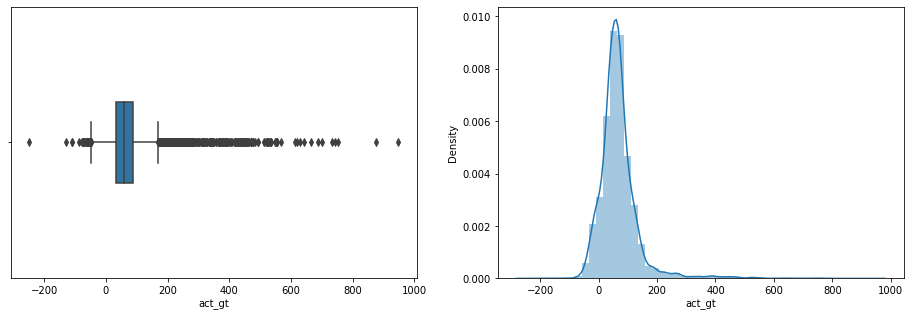

In [873]:
# Explore act_gt
print(df['act_gt'].describe())
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['act_gt'], width=0.3)
plt.subplot(1,2,2)
sns.distplot(df['act_gt'])
plt.show()

In [874]:
# How many cases have a negative actual groundtime?
df[(df['act_gt'] < 0)].shape

(917, 24)

In [875]:
# Identifying a specific aircraft wherer flt_sched_gt < 0 to analyse why there is a negative schedulded gt for a specific date
condition = df['act_gt'] < 0
sample = df[condition].sample(n=3, random_state=42)

sample

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay,AC_type,routing,sched_gt,act_gt,sched_gt_before,act_gt_before
7056,272214815,Fisherhaven,East Carmen,2019-06-18 18:13:00,2019-06-18 19:03:00,ECLWIX,83.0,36.0,40.0,A,"[Henry Rice_284_36_40_ca, Stephanie Sanchez_28...",[],2019-06-18 16:50:00,2019-06-18 17:50:00,40.0,2019-06-18 16:50:00,2019-06-18 17:50:00,73.0,E95,True,40.0,-16.0,40.0,49.0
585,272024176,New Jessica,East Carmen,2019-06-02 15:23:00,2019-06-02 18:34:00,ECLBCX,93.0,144.0,145.0,A,"[Christopher Gomez_107_144_145_ca, Lynn Lutz_n...",[ca],2019-06-02 13:50:00,2019-06-02 17:15:00,45.0,2019-06-02 13:50:00,2019-06-02 17:15:00,79.0,321,True,50.0,-13.0,145.0,167.0
9409,272010935,East Carmen,North Anna,2019-06-24 19:32:00,2019-06-24 20:17:00,ECLGBX,92.0,16.0,40.0,A,"[Rebecca Castro_333_16_40_cp, James Hardy_333_...",[],2019-06-24 18:00:00,2019-06-24 18:50:00,30.0,2019-06-24 18:00:00,2019-06-24 18:50:00,87.0,DH4,True,30.0,-44.0,40.0,130.0


In [876]:
# Now looking at the rotation of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLWIX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-18')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay,AC_type,routing,sched_gt,act_gt,sched_gt_before,act_gt_before
6741,271967676,East Carmen,Lake Danielburgh,2019-06-18 05:26:00,2019-06-18 06:27:00,ECLWIX,61.0,0.0,0.0,Start,"[Henry Rose_nan_nan_nan_cp, Alyssa Edwards_nan...",[],2019-06-18 04:25:00,2019-06-18 05:35:00,40.0,NaT,NaT,52.0,E95,True,30.0,-10.0,NaN,NaN
6795,271967806,Lake Danielburgh,East Carmen,2019-06-18 06:17:00,2019-06-18 07:22:00,ECLWIX,12.0,43.0,30.0,A,"[Alyssa Edwards_17_43_30_ca, John Roberts_17_4...",[],2019-06-18 06:05:00,2019-06-18 07:25:00,40.0,2019-06-18 06:05:00,2019-06-18 07:25:00,-3.0,E95,True,55.0,140.0,30.0,-10.0
6859,271989523,East Carmen,Whiteland,2019-06-18 09:42:00,2019-06-18 12:01:00,ECLWIX,82.0,98.0,75.0,C,"[John Greer_nan_nan_nan_cp, Jade Reed_nan_nan_...","[ca, ca, ca]",2019-06-18 08:20:00,2019-06-18 10:50:00,40.0,2019-06-18 08:20:00,2019-06-18 10:50:00,71.0,E95,True,70.0,107.0,55.0,140.0
6940,271989733,Whiteland,East Carmen,2019-06-18 13:48:00,2019-06-18 16:12:00,ECLWIX,108.0,74.0,70.0,A,"[John Greer_127_74_70_cp, Tanner Ramos_127_74_...",[],2019-06-18 12:00:00,2019-06-18 14:25:00,40.0,2019-06-18 12:00:00,2019-06-18 14:25:00,107.0,E95,True,50.0,22.0,70.0,107.0
7003,272029461,East Carmen,Fisherhaven,2019-06-18 16:34:00,2019-06-18 17:24:00,ECLWIX,79.0,0.0,0.0,Start,"[Henry Rice_nan_nan_nan_ca, Stephanie Sanchez_...",[],2019-06-18 15:15:00,2019-06-18 16:10:00,40.0,2019-06-18 15:15:00,2019-06-18 16:10:00,74.0,E95,True,40.0,49.0,50.0,22.0
7056,272214815,Fisherhaven,East Carmen,2019-06-18 18:13:00,2019-06-18 19:03:00,ECLWIX,83.0,36.0,40.0,A,"[Henry Rice_284_36_40_ca, Stephanie Sanchez_28...",[],2019-06-18 16:50:00,2019-06-18 17:50:00,40.0,2019-06-18 16:50:00,2019-06-18 17:50:00,73.0,E95,True,40.0,-16.0,40.0,49.0
7101,271980231,East Carmen,Castroville,2019-06-18 18:47:00,2019-06-18 21:00:00,ECLWIX,17.0,0.0,0.0,Start,"[William Hays_nan_nan_nan_cp, Patrick King_nan...",[],2019-06-18 18:30:00,2019-06-18 20:50:00,40.0,2019-06-18 18:30:00,2019-06-18 20:50:00,10.0,E95,True,NaN,NaN,40.0,-16.0


In [877]:
# Now looking at the rotation of the second registration for the specific day
df[(df['flt_ac_reg'] == 'ECLGBX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-02')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay,AC_type,routing,sched_gt,act_gt,sched_gt_before,act_gt_before
397,272170972,Haynesside,East Carmen,2019-06-02 05:34:00,2019-06-02 06:49:00,ECLGBX,4.0,0.0,0.0,Start,"[Samantha Anderson_nan_nan_nan_cp, Catherine S...",[],2019-06-02 05:30:00,2019-06-02 06:45:00,35.0,NaT,NaT,4.0,DH4,True,265.0,276.0,NaN,NaN
526,272201386,East Carmen,North Christopherburgh,2019-06-02 11:25:00,2019-06-02 12:28:00,ECLGBX,15.0,68.0,75.0,B,"[Natalie Strickland_120_68_75_cp, Philip Wilco...",[],2019-06-02 11:10:00,2019-06-02 12:10:00,35.0,NaT,NaT,18.0,DH4,True,65.0,147.0,265.0,276.0
574,272201596,North Christopherburgh,East Carmen,2019-06-02 14:55:00,2019-06-02 15:50:00,ECLGBX,100.0,0.0,0.0,Start,"[Abigail Garcia_nan_nan_nan_cp, Dr. Christine ...",[],2019-06-02 13:15:00,2019-06-02 14:20:00,35.0,2019-06-02 13:15:00,2019-06-02 14:20:00,90.0,DH4,True,65.0,69.0,65.0,147.0
608,272035175,East Carmen,East Allisontown,2019-06-02 16:59:00,2019-06-02 17:30:00,ECLGBX,94.0,43.0,70.0,C,"[Belinda Hall_nan_nan_nan_cp, Gary Nguyen_nan_...",[ca],2019-06-02 15:25:00,2019-06-02 16:00:00,35.0,2019-06-02 15:25:00,2019-06-02 16:00:00,90.0,DH4,True,40.0,-35.0,65.0,69.0
644,272035366,East Allisontown,East Carmen,2019-06-02 16:55:00,2019-06-02 17:33:00,ECLGBX,15.0,45.0,40.0,A,"[Yesenia Patterson_254_45_40_ca, Gary Nguyen_2...",[],2019-06-02 16:40:00,2019-06-02 17:20:00,35.0,2019-06-02 16:40:00,2019-06-02 17:20:00,13.0,DH4,True,45.0,47.0,40.0,-35.0
676,272034841,East Carmen,East Allisontown,2019-06-02 18:20:00,2019-06-02 18:49:00,ECLGBX,15.0,45.0,45.0,A,"[Corey Fields_294_45_45_ca, Yesenia Patterson_...",[],2019-06-02 18:05:00,2019-06-02 18:40:00,30.0,2019-06-02 18:05:00,2019-06-02 18:40:00,9.0,DH4,True,NaN,NaN,45.0,47.0


In [878]:
# Now looking at the rotation of the second registration for the specific day
df[(df['flt_ac_reg'] == 'ECLDGX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-24')]

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay,AC_type,routing,sched_gt,act_gt,sched_gt_before,act_gt_before
9116,271997068,East Carmen,Joneshaven,2019-06-24 05:44:00,2019-06-24 06:57:00,ECLDGX,14.0,0.0,0.0,Start,"[Daniel Smith_nan_nan_nan_cp, Larry Knight_nan...",[],2019-06-24 05:30:00,2019-06-24 06:55:00,40.0,NaT,NaT,2.0,319,True,65.0,85.0,NaN,NaN
9164,271997278,Joneshaven,East Carmen,2019-06-24 08:22:00,2019-06-24 09:38:00,ECLDGX,22.0,76.0,65.0,A,"[Michael Lopez Jr._62_76_65_ca, Larry Knight_6...",[],2019-06-24 08:00:00,2019-06-24 09:25:00,40.0,2019-06-24 08:00:00,2019-06-24 09:25:00,13.0,319,True,100.0,154.0,65.0,85.0
9254,272200424,East Carmen,Joneshaven,2019-06-24 12:12:00,2019-06-24 13:23:00,ECLDGX,67.0,0.0,0.0,Start,"[Donald Guzman_nan_nan_nan_ca, Stephanie Ander...",[],2019-06-24 11:05:00,2019-06-24 12:25:00,40.0,2019-06-24 11:05:00,2019-06-24 12:25:00,58.0,319,True,45.0,91.0,100.0,154.0
9297,271998886,Joneshaven,East Carmen,2019-06-24 14:54:00,2019-06-24 16:14:00,ECLDGX,104.0,45.0,45.0,A,"[Todd White_195_45_45_cp, Donald Guzman_195_45...",[],2019-06-24 13:10:00,2019-06-24 14:30:00,40.0,2019-06-24 13:10:00,2019-06-24 14:30:00,104.0,319,True,70.0,64.0,45.0,91.0
9359,271965689,East Carmen,West Jennifer,2019-06-24 17:18:00,2019-06-24 18:48:00,ECLDGX,98.0,49.0,60.0,B2,"[Michael Fuentes_nan_nan_nan_ca, Paul Knapp_24...","[cp, cp, ca, ca]",2019-06-24 15:40:00,2019-06-24 17:15:00,40.0,2019-06-24 15:40:00,2019-06-24 17:15:00,93.0,319,True,45.0,-45.0,70.0,64.0
9406,271965863,West Jennifer,East Carmen,2019-06-24 18:03:00,2019-06-24 19:25:00,ECLDGX,3.0,45.0,45.0,A,"[Michael Frost_301_45_45_cp, Michael Fuentes_3...",[],2019-06-24 18:00:00,2019-06-24 19:30:00,40.0,NaT,NaT,-5.0,319,True,NaN,NaN,45.0,-45.0


As there is no real pattern to be observed nothing will be done for now regarding those negative actual groundtimes.

## Scheduled Departure

In [879]:
# Check mismatches in sched dep between flight data and ground data
sched_dep_mismatch = df[df.gnd_sched_dep.notna() & (df['flt_sched_dep'].astype(str) != df['gnd_sched_dep'].astype(str))]
sched_dep_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_dep,gnd_sched_arr,arr_delay,AC_type,routing,sched_gt,act_gt,sched_gt_before,act_gt_before


In [880]:
# Drop gnd_sched_dep as all information is already contained in flt_sched_dep; create new feature for day of the week and hour of the day
df = df.drop(columns='gnd_sched_dep')

## Scheduled Arrival

In [881]:
# Check mismatches in sched arrival  between flight data and ground data
sched_arr_mismatch = df[df.gnd_sched_arr.notna() & (df['flt_sched_arr'].astype(str) != df['gnd_sched_arr'].astype(str))]
sched_arr_mismatch

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_mingt,gnd_sched_arr,arr_delay,AC_type,routing,sched_gt,act_gt,sched_gt_before,act_gt_before


In [882]:
# Drop gnd_sched_arr as all information is already contained in flt_sched_arr; create new feature for hour of the day
df = df.drop(columns='gnd_sched_arr')

In [883]:
print(df.shape)
df.head()

(11892, 22)


,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,dep_delay,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_sched_dep,flt_sched_arr,gnd_mingt,arr_delay,AC_type,routing,sched_gt,act_gt,sched_gt_before,act_gt_before
9,272024970,New Jessica,East Carmen,2019-06-01 03:50:00,2019-06-01 07:01:00,ECLBAX,25.0,0.0,0.0,Start,"[Sean Weeks_nan_nan_nan_ca, Tony Lloyd_nan_nan...",[],2019-06-01 03:25:00,2019-06-01 06:45:00,45.0,16.0,321,True,95.0,94.0,NaN,NaN
117,272022230,East Carmen,South Nathaniel,2019-06-01 08:35:00,2019-06-01 10:41:00,ECLBAX,15.0,60.0,60.0,B,"[Toni Rodriguez_48_60_60_ca, Rachel Smith_48_6...",[],2019-06-01 08:20:00,2019-06-01 10:35:00,45.0,6.0,321,True,75.0,120.0,95.0,94.0
194,272212848,South Nathaniel,East Carmen,2019-06-01 12:41:00,2019-06-01 14:52:00,ECLBAX,51.0,68.0,75.0,A,"[Toni Rodriguez_127_68_75_ca, Rachel Smith_127...",[],2019-06-01 11:50:00,2019-06-01 14:15:00,45.0,37.0,321,True,80.0,86.0,75.0,120.0
268,271997824,East Carmen,Joneshaven,2019-06-01 16:18:00,2019-06-01 17:32:00,ECLBAX,43.0,64.0,70.0,B2,"[Tyler Morris_224_64_70_ca, Sergio Cummings_22...","[ca, cp, ca, ca, ca]",2019-06-01 15:35:00,2019-06-01 17:00:00,45.0,32.0,321,True,50.0,32.0,80.0,86.0
302,271998033,Joneshaven,East Carmen,2019-06-01 18:04:00,2019-06-01 19:14:00,ECLBAX,14.0,42.0,50.0,A,"[Sergio Cummings_279_42_50_cp, Jackie Black_27...",[],2019-06-01 17:50:00,2019-06-01 19:10:00,45.0,4.0,321,True,NaN,NaN,50.0,32.0


In [884]:
df.to_csv('../data/interim/explored.csv')
df.to_pickle('../data/interim/explored.pkl')